In [147]:
import pandas as pd
import sqlite3
from tqdm.notebook import tqdm
import pandas as pd
import numpy as np
import re
import plotly.express as px

import plotly.graph_objects as go
from ipywidgets import widgets

import chart_studio.plotly as py

import chart_studio
chart_studio.tools.set_credentials_file(username='ceverest', api_key='V6TM2axFVMohJrseeMna')

In [5]:
#Show all columns in dataframe by scrolling to the right
pd.options.display.max_columns = None
#Make each column accomodate full text
pd.set_option('display.max_colwidth', 0)
#Print up to 150 rows
pd.options.display.max_rows = 150

In [135]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_display_name
    , COUNT(DISTINCT(from_npi)) AS count_from_npi
    , SUM(patient_count) AS total_patients
FROM hosp_refs
WHERE from_display_name IN ('Adult Reconstructive Orthopaedic Surgery Physician',
                         'Orthopaedic Foot and Ankle Surgery Physician',
                         'Orthopaedic Hand Surgery Physician',
                         'Orthopaedic Surgery Physician',
                         'Orthopaedic Surgery of the Spine Physician',
                         'Orthopaedic Trauma Physician',
                            'Sports Medicine (Orthopaedic Surgery) Physician',
                            'Foot & Ankle Surgery Podiatrist',
                         'Foot Surgery Podiatrist',
                         'Podiatrist',
                         'Primary Podiatric Medicine Podiatrist',
                         'Sleep Medicine (Psychiatry & Neurology) Physician',
                            'Pulmonary Disease Physician',
                            'Rheumatology Physician',
                            'Sleep Medicine (Internal Medicine) Physician',
                            'Hypertension Specialist Physician',
                            'Endocrinology, Diabetes & Metabolism Physician')
GROUP BY from_display_name
"""
#                            

npi_counts = pd.read_sql(query,db)

db.close()
npi_counts.shape

(17, 3)

In [136]:
npi_counts

,from_display_name,count_from_npi,total_patients
0,Adult Reconstructive Orthopaedic Surgery Physician,6,2484
1,"Endocrinology, Diabetes & Metabolism Physician",35,8882
2,Foot & Ankle Surgery Podiatrist,21,5201
3,Foot Surgery Podiatrist,2,254
4,Hypertension Specialist Physician,1,203
5,Orthopaedic Foot and Ankle Surgery Physician,3,539
6,Orthopaedic Hand Surgery Physician,12,2524
7,Orthopaedic Surgery Physician,86,21316
8,Orthopaedic Surgery of the Spine Physician,11,3193
9,Orthopaedic Trauma Physician,6,804


### Orthopaedic Surgeons

In [6]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_display_name IN ('Adult Reconstructive Orthopaedic Surgery Physician',
                         'Orthopaedic Foot and Ankle Surgery Physician',
                         'Orthopaedic Hand Surgery Physician',
                         'Orthopaedic Surgery Physician',
                         'Orthopaedic Surgery of the Spine Physician',
                         'Orthopaedic Trauma Physician',
                            'Sports Medicine (Orthopaedic Surgery) Physician',
                            'Foot & Ankle Surgery Podiatrist',
                         'Foot Surgery Podiatrist',
                         'Podiatrist',
                         'Primary Podiatric Medicine Podiatrist')
GROUP BY from_classification, hospital_group
"""
#                            

ortho = pd.read_sql(query,db)

db.close()
ortho.shape

(19, 7)

In [8]:
ortho.count_from_npi.sum()

278

In [21]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_display_name IN ('Adult Reconstructive Orthopaedic Surgery Physician',
                         'Orthopaedic Foot and Ankle Surgery Physician',
                         'Orthopaedic Hand Surgery Physician',
                         'Orthopaedic Surgery Physician',
                         'Orthopaedic Surgery of the Spine Physician',
                         'Orthopaedic Trauma Physician',
                            'Sports Medicine (Orthopaedic Surgery) Physician')
GROUP BY from_classification
"""
#                            

ortho = pd.read_sql(query,db)

db.close()
ortho.shape

(1, 6)

In [22]:
ortho

,from_classification,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
0,Orthopaedic Surgery,135,21,33612,56335,1.68


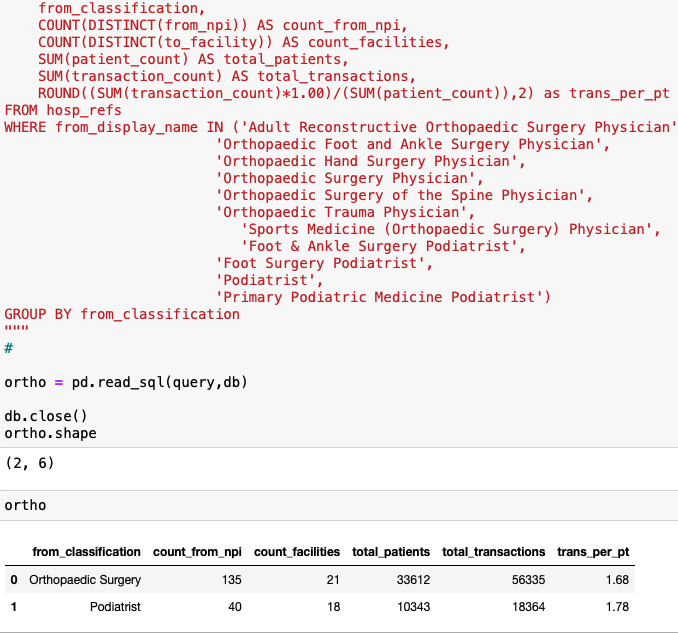

### Podiatry

In [19]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    from_classification,
   ---- from_display_name,
----    hospital_group,
    COUNT(DISTINCT(from_npi)) AS count_from_npi,
    COUNT(DISTINCT(to_facility)) AS count_facilities,
    SUM(patient_count) AS total_patients,
    SUM(transaction_count) AS total_transactions,
    ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
FROM hosp_refs
WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                         'Foot Surgery Podiatrist',
                         'Podiatrist',
                         'Primary Podiatric Medicine Podiatrist')
GROUP BY from_classification 
     ---   , hospital_group
"""
#                            

pods= pd.read_sql(query,db)

db.close()
pods.shape

(1, 6)

In [20]:
pods

,from_classification,count_from_npi,count_facilities,total_patients,total_transactions,trans_per_pt
0,Podiatrist,40,18,10343,18364,1.78


In [131]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'
query = """
SELECT
    from_display_name
    , from_npi
    , from_physician
    , hospital_group
    , SUM(COUNT(DISTINCT(hospital_group))) OVER (PARTITION BY from_physician) AS count_hospital_groups --- number of hospital groups to which provider refers
   , SUM(patient_count) AS total_patients
---    , SUM(transaction_count) AS total_transactions
    , ROUND((SUM(transaction_count)*1.00)/(SUM(patient_count)),2) as trans_per_pt
    , ROUND((SUM(patient_count)*1.00)/SUM(SUM(patient_count)) OVER (PARTITION BY from_physician),2) AS provider_patient_share  --- % share of providers patients referred to that group
---   , ROUND((SUM(patient_count)*1.00)/SUM(SUM(patient_count)) OVER (PARTITION BY from_classification),2)  AS market_patient_share
FROM hosp_refs
WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                         'Foot Surgery Podiatrist',
                         'Podiatrist',
                         'Primary Podiatric Medicine Podiatrist')
GROUP BY from_npi, from_physician, hospital_group
"""

# SELECT d1, d2, sum(v)/sum(sum(v)) OVER (PARTITION BY d1) AS share
#FROM   test
#GROUP  BY d1, d2;                           

pods= pd.read_sql(query,db)

db.close()
pods.shape

(84, 8)

In [132]:
pods['provider_patient_share']=pods['provider_patient_share']*100

In [133]:
pods

,from_display_name,from_npi,from_physician,hospital_group,count_hospital_groups,total_patients,trans_per_pt,provider_patient_share
0,Podiatrist,1952542698,ADAM HICKS,Vanderbilt University Medical Center,1,691,2.36,100.0
1,Foot & Ankle Surgery Podiatrist,1003855537,CAROLINE GANNON,Vanderbilt University Medical Center,2,98,1.79,41.0
2,Foot & Ankle Surgery Podiatrist,1003855537,CAROLINE GANNON,Williamson Medical Center,2,142,1.61,59.0
3,Foot & Ankle Surgery Podiatrist,1205155850,CHRISTOPHER BENAC,Vanderbilt University Medical Center,1,96,1.66,100.0
4,Foot & Ankle Surgery Podiatrist,1902015019,CHRISTOPHER FRAZIER,HCA,5,62,1.44,12.0
5,Foot & Ankle Surgery Podiatrist,1902015019,CHRISTOPHER FRAZIER,Macon County General Hospital,5,34,1.59,7.0
6,Foot & Ankle Surgery Podiatrist,1902015019,CHRISTOPHER FRAZIER,Riverview Regional Medical Center,5,102,1.66,20.0
7,Foot & Ankle Surgery Podiatrist,1902015019,CHRISTOPHER FRAZIER,Sumner Regional Medical Center,5,264,2.98,52.0
8,Foot & Ankle Surgery Podiatrist,1902015019,CHRISTOPHER FRAZIER,Vanderbilt University Medical Center,5,41,1.80,8.0
9,Podiatrist,1518078039,DAVID SONG,Vanderbilt University Medical Center,2,74,1.68,47.0


In [134]:
import plotly.express as px
df = pods
fig = px.sunburst(df, path=['from_physician', 'hospital_group'], values='total_patients')
fig.show()

In [139]:
df=pods
fig = px.bar(df, 
             color='from_display_name', 
             x='hospital_group',
             y='total_patients',
            # facet_col='from_display_name', #facet_col_wrap=2,
            title='Patient Volume by Sub-Speciality in Orthopedic Surgery & Hospital Group')
fig.show()

In [129]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'
query = """
WITH non_vandy_refs AS 
    (
    SELECT
          from_npi
        , from_physician
        , SUM(COUNT(DISTINCT(hospital_group))) OVER (PARTITION BY from_physician) AS count_hospital_groups --- number of hospital groups to which provider refers
        , SUM(patient_count) AS non_vandy_pts
    FROM hosp_refs
    WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                             'Foot Surgery Podiatrist',
                             'Podiatrist',
                             'Primary Podiatric Medicine Podiatrist')
    AND hospital_group <> 'Vanderbilt University Medical Center'
    GROUP BY from_npi, from_physician
    ),
    
all_refs AS 
    (
    SELECT
         from_npi
        , from_physician
        , SUM(patient_count) AS total_patients
    FROM hosp_refs
    WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                                'Foot Surgery Podiatrist',
                                'Podiatrist',
                                'Primary Podiatric Medicine Podiatrist')
    GROUP BY from_npi, from_physician
    )
SELECT 
    all_refs.from_npi
    , non_vandy_refs.from_physician
    , count_hospital_groups
    , non_vandy_pts
    , total_patients
    , ROUND(((non_vandy_pts*1.00)/total_patients)*100,2) AS pct_non_vandy
FROM non_vandy_refs
INNER JOIN all_refs
ON non_vandy_refs.from_npi = all_refs.from_npi
ORDER BY total_patients DESC

---, non_vandy_refs.from_physician = all_refs.from_physician
"""

# SELECT d1, d2, sum(v)/sum(sum(v)) OVER (PARTITION BY d1) AS share
#FROM   test
#GROUP  BY d1, d2;                           

pods= pd.read_sql(query,db)

db.close()
pods

,from_npi,from_physician,count_hospital_groups,non_vandy_pts,total_patients,pct_non_vandy
0,1487680237,IRENE CAMPBELL,4,620,865,71.68
1,1558306217,DAVID TRENNER,2,110,562,19.57
2,1417952581,TOD BUSHMAN,1,399,532,75.00
3,1902015019,CHRISTOPHER FRAZIER,4,462,503,91.85
4,1598791790,KEITH OSORIO,3,282,444,63.51
5,1326047119,KEVIN DAVIS,1,346,417,82.97
6,1245214899,MARDON DAY,2,322,407,79.12
7,1841274404,MICHELE WHITTAKER,2,324,402,80.60
8,1285920108,TIMOTHY BUSH,1,296,372,79.57
9,1588606347,LAWRENCE BURNS,2,268,328,81.71


In [ ]:
import plotly.express as px
df = pods
fig = px.sunburst(df, path=['from_physician', 'time', 'sex'], values='total_bill')
fig.show()

In [ ]:
query = """
SELECT
     from_npi
    , from_physician
    , SUM(COUNT(DISTINCT(hospital_group))) OVER (PARTITION BY from_physician) AS count_hospital_groups --- number of hospital groups to which provider refers
    , SUM(patient_count) AS total_patients
FROM hosp_refs
WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                            'Foot Surgery Podiatrist',
                            'Podiatrist',
                            'Primary Podiatric Medicine Podiatrist')
GROUP BY from_npi, from_physician
ORDER BY total_patients DESC
"""

In [119]:
pods.total_patients.sum()

10343

In [120]:
pods['market_share'] = (pods['total_patients'] / pods['total_patients'].sum()) * 100

In [121]:
pods

,from_npi,from_physician,count_hospital_groups,total_patients,"ROUND((patient_count*1.00)/SUM(patient_count),2)",market_share
0,1487680237,IRENE CAMPBELL,5,865,0.08,8.363144
1,1952542698,ADAM HICKS,1,691,1.00,6.680847
2,1558306217,DAVID TRENNER,3,562,0.80,5.433627
3,1417952581,TOD BUSHMAN,2,532,0.10,5.143575
4,1902015019,CHRISTOPHER FRAZIER,5,503,0.12,4.863192
5,1780764779,KIRBY DEETER,1,467,1.00,4.515131
6,1598791790,KEITH OSORIO,4,444,0.11,4.292758
7,1326047119,KEVIN DAVIS,2,417,0.17,4.031712
8,1245214899,MARDON DAY,3,407,0.48,3.935029
9,1841274404,MICHELE WHITTAKER,3,402,0.51,3.886687


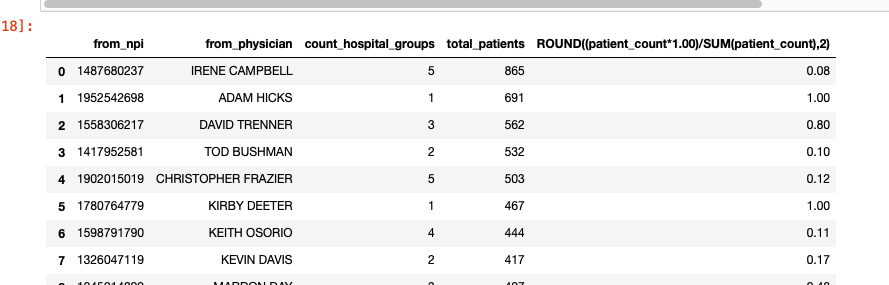

In [24]:
db = sqlite3.connect('../data/nppes_lite.sqlite') #reopen the connection

#select facility name where facility has to_grouping of 'Hospitals'

query = """
SELECT
    *
FROM hosp_refs
WHERE from_display_name IN ('Foot & Ankle Surgery Podiatrist',
                         'Foot Surgery Podiatrist',
                         'Podiatrist',
                         'Primary Podiatric Medicine Podiatrist')
LIMIT 1
"""
#                            

test= pd.read_sql(query,db)

db.close()
test

,from_npi,to_npi,from_physician,to_facility,hospital_group,from_address,to_address,from_tax,to_tax,from_grouping,to_grouping,from_classification,to_classification,from_specialization,to_specialization,from_display_name,to_display_name,patient_count,transaction_count,average_day_wait
0,1245214899,1023055126,MARDON DAY,Centennial Medical Center HCA,HCA,2400 PATTERSON ST,2300 PATTERSON ST,213ES0103X,282N00000X,Podiatric Medicine & Surgery Service Providers,Hospitals,Podiatrist,General Acute Care Hospital,Foot & Ankle Surgery,None,Foot & Ankle Surgery Podiatrist,General Acute Care Hospital,195,311,28.698


### Scraps

In [ ]:
WHERE from_grouping NOT IN ('Managed Care Organizations',
                            'Nursing Service Providers',
                            'Suppliers',
                            'Transportation Services',
                            'Managed Care Organizations',
                            'Dental Providers',
                            'Laboratories',
                            'Physician Assistants & Advanced Practice Nursing Providers',
                            'Student, Health Care'
                            )
AND from_classification NOT IN ('Radiology',
                            'Pathology',
                             'Anesthesiology',
                           'Emergency Medicine',
                             'Obstetrics & Gynecology',
                             'Pediatrics',
                             'Clinical Pharmacology',
                             'Anesthesiologist Assistant')